In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from utils import Dataset
from utils.helpers import getDatasetPath

In [9]:
dataset = Dataset(getDatasetPath()).getFolds([i for i in range(5)])

sequences = dataset["annotation"].values

## Average Position (Absolute)

In [32]:
positions = ["".join([seq[i] for seq in sequences]) for i in range(70)]

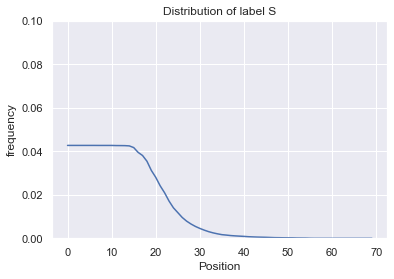

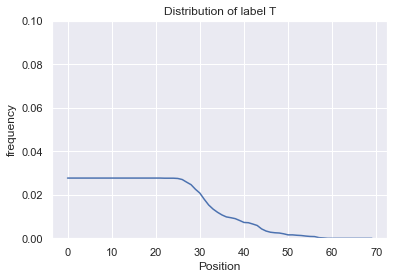

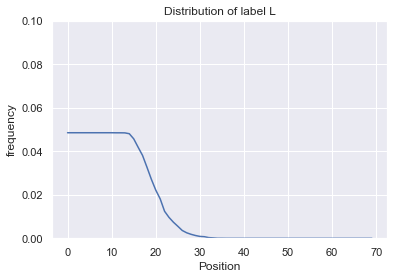

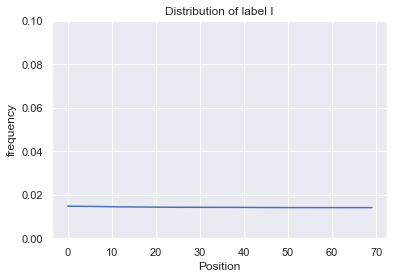

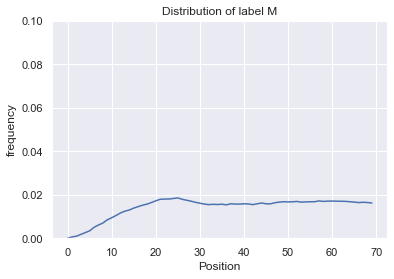

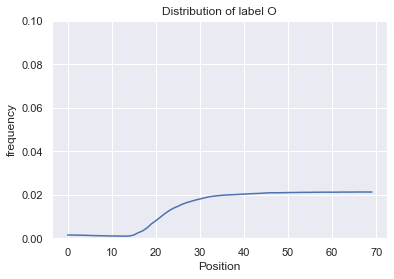

In [31]:
for label in "STLIMO":
    frequencies = [position.count(label) for position in positions]
    n = sum(frequencies)
    scaled_frequencies = [freq / n for freq in frequencies]
    plt.plot(scaled_frequencies)
    plt.title(f"Distribution of label {label}")
    plt.gca().set_xlabel("Position")
    plt.gca().set_ylabel("frequency")
    plt.gca().set_ylim([0, .1])
    plt.savefig(f"plots/output/position_distribution_{label}")
    plt.show()

## Transmembrane Length Distribution

In [60]:
import re

lengths = []
before = []
after = []
for sequence in sequences:
    transmembrane_regions = re.finditer("M+", sequence)
    for region in transmembrane_regions:
        start, end = region.span()
        lengths.append(end - start)
        before.append(sequence[max(0, start-10):start])
        after.append(sequence[end+1:min(len(sequence), end+11)])

In [ ]:
plt.hist(lengths, bins=40, range=(0, 40), density=True)
plt.gca().set_xlabel("Length")
plt.gca().set_ylabel("Probability")

plt.suptitle("Length distribution of transmembrane segments")
plt.savefig("plots/output/transmembrane_segment_length", dpi=240)

10